<a href="https://colab.research.google.com/github/faysalislam/12misha/blob/master/tlf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

Using TensorFlow backend.


In [14]:
mobile = keras.applications.mobilenet.MobileNet()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 1s 0us/step


In [0]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

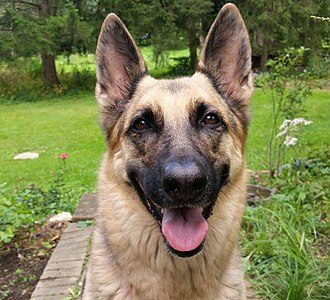

In [16]:
Image(filename='German_Shepherd.jpg')

In [17]:
preprocessed_image = prepare_image('German_Shepherd.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n02106662', 'German_shepherd', 0.9796372),
  ('n02105162', 'malinois', 0.020184083),
  ('n02091467', 'Norwegian_elkhound', 0.00015799515),
  ('n02116738', 'African_hunting_dog', 5.2901587e-06),
  ('n02105251', 'briard', 3.9127376e-06)]]

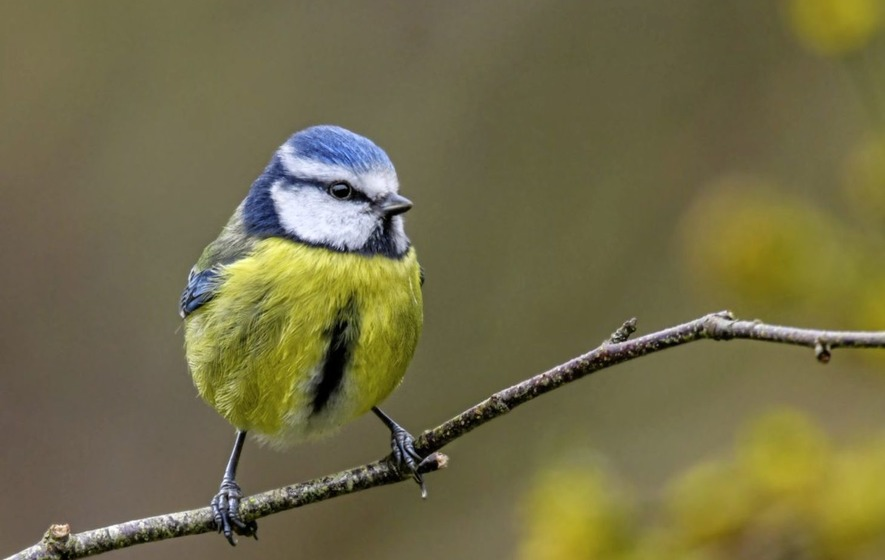

In [20]:
Image(filename='blue_tit.jpg')

In [21]:
preprocessed_image = prepare_image('blue_tit.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01592084', 'chickadee', 0.95554703),
  ('n01530575', 'brambling', 0.012973111),
  ('n01828970', 'bee_eater', 0.012916374),
  ('n01532829', 'house_finch', 0.010978723),
  ('n01580077', 'jay', 0.0020677082)]]

In [22]:
!pip3 install google_images_download

     |████████████████████████████████| 911kB 13.6MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=f4e94a324d6565135b6a317eebf6f3e6adfaa1f5e20496975d8721148c46425f
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

In [0]:
response = google_images_download.googleimagesdownload()

In [0]:
arguments = {"keywords":"blue tit","limit":100,"print_urls":False,"format":"jpg", "size":">400*300"}

In [26]:
paths = response.download(arguments)


Item no.: 1 --> Item name = blue tit
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



In [0]:
arguments = {"keywords":"crow","limit":100,"print_urls":False, "format":"jpg", "size":">400*300"}

In [29]:
paths = response.download(arguments)


Item no.: 1 --> Item name = crow
Evaluating...
Starting Download...
Completed Image ====> 1.Corvus_corone_-near_Canford_Cliffs%2C_Poole%2C_England-8.jpg
Completed Image ====> 2.59858041-480px.jpg
Wrong image format returned. Skipping...
Completed Image ====> 3.59858031-480px.jpg
Completed Image ====> 4.dsc_1028.jpg
Completed Image ====> 5.Fish_Crow_RWSinclair_FlickrCC_314.jpg
Completed Image ====> 6.American-Crow2_cuatrok77_flickr_Web.jpg
Completed Image ====> 7.504722-istock-596055082.jpg
Completed Image ====> 8.15352222_web1_Mabel-Dec-19-18.jpg
Completed Image ====> 9.5900070063_931f05fdb9_b.jpg
Completed Image ====> 10.20TB-CROWS-articleLarge-v2.jpg
Completed Image ====> 11.AmericanCrow.jpg
Wrong image format returned. Skipping...
Completed Image ====> 12.Corvus_coronoides_-_Doughboy_Head.jpg
Completed Image ====> 13.a1_4202_1_fish-crow_alejandra_lewandowski_kk.jpg
Completed Image ====> 14.AmericanCrow_PaulPowers_500px.jpg
Wrong image format returned. Skipping...
Completed Image ==

In [30]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [32]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [35]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('downloads',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 81 images belonging to 2 classes.


In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2/2 [==============================] - 7s 3s/step - loss: 0.4379 - acc: 0.5774
Epoch 2/10
2/2 [==============================] - 1s 568ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 642ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 4/10
2/2 [==============================] - 2s 751ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 5/10
2/2 [==============================] - 2s 994ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 679ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
2/2 [==============================] - 2s 823ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
2/2 [==============================] - 2s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 9/10
2/2 [==============================] - 1s 512ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
2/2 [=========================

In [0]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [0]:
img_path = 'crow.jpg'
new_image = load_image(img_path)

In [0]:
pred = model.predict(new_image)

In [40]:
pred

array([[0., 1.]], dtype=float32)